In [63]:
import os
from torch.utils.data import DataLoader,Dataset, random_split, Subset
from skimage import io, transform
from matplotlib import pyplot as plt
import pandas as pd
import fnmatch
import torch

In [64]:
class XrayDataset(Dataset):

    def __init__(self, image_dir):
        """Initialize the attributes of the object of the class."""
        self.image_dir = image_dir
        self.image_path_list = sorted(self._find_files(image_dir))
        self.classes = self._get_class()
        self.class_to_idx  = self._get_class_index()

    def __len__(self):
        """Return the size of the dataset."""
        return len(self.image_path_list)

    def __getitem__(self, index):
        """Return a data sample (=image) for a given index, along with the name of the corresponding pokemon."""
        
        # TO DO:
        # - get the image path corresponding to 'index' (use the list 'self.image_path_list')
        # - get the pokemon name
        # - load the image into a numpy array x
        # - transform x into a pytorch tensor of type 'float'
        # - return the tensor x and the pokemon name
        image_path = self.image_path_list[index]
        label = image_path.split('/')[-2]
        label = self.class_to_idx[label]
        x = io.imread(image_path)
        x = torch.tensor(x, dtype=float)
        
        return x, label

    def _find_files(self, directory, pattern='*.jpeg'):
        """Recursively find all files matching the pattern."""
        image_path_list = []
        for root, dirnames, filenames in os.walk(directory):
            for filename in fnmatch.filter(filenames, pattern):
                image_path_list.append(os.path.join(root, filename))
        return image_path_list
    
    def _get_class(self):
        classes = []
        for path in self.image_path_list:
            class_image = path.split('/')[2]
            if class_image not in classes:
                classes.append(class_image)
        return classes
    
    def _get_class_index(self):
        idx_to_class = {i:j for i, j in enumerate(self.classes)}
        class_to_idx = {value:key for key,value in idx_to_class.items()}
        return class_to_idx

In [65]:
# We can initialize the dataset by providing the directory of the image corpus data
image_dir = 'Dataset/train'
dataset = XrayDataset(image_dir=image_dir)

# You can use the '_find_files' method to get the list of images paths
image_path_list = dataset._find_files(image_dir)

# Equivalently, since this list is stored as an inner attribute, you can access it directly:
image_path_list = dataset.image_path_list

# Display all file paths
for l in image_path_list:
    print(l)
print('Number of images in the list', len(image_path_list))

Dataset/train/NORMAL/IM-0115-0001.jpeg
Dataset/train/NORMAL/IM-0117-0001.jpeg
Dataset/train/NORMAL/IM-0119-0001.jpeg
Dataset/train/NORMAL/IM-0122-0001.jpeg
Dataset/train/NORMAL/IM-0125-0001.jpeg
Dataset/train/NORMAL/IM-0127-0001.jpeg
Dataset/train/NORMAL/IM-0128-0001.jpeg
Dataset/train/NORMAL/IM-0129-0001.jpeg
Dataset/train/NORMAL/IM-0131-0001.jpeg
Dataset/train/NORMAL/IM-0133-0001.jpeg
Dataset/train/NORMAL/IM-0135-0001.jpeg
Dataset/train/NORMAL/IM-0137-0001.jpeg
Dataset/train/NORMAL/IM-0140-0001.jpeg
Dataset/train/NORMAL/IM-0141-0001.jpeg
Dataset/train/NORMAL/IM-0143-0001.jpeg
Dataset/train/NORMAL/IM-0145-0001.jpeg
Dataset/train/NORMAL/IM-0147-0001.jpeg
Dataset/train/NORMAL/IM-0149-0001.jpeg
Dataset/train/NORMAL/IM-0151-0001.jpeg
Dataset/train/NORMAL/IM-0152-0001.jpeg
Dataset/train/NORMAL/IM-0154-0001.jpeg
Dataset/train/NORMAL/IM-0156-0001.jpeg
Dataset/train/NORMAL/IM-0158-0001.jpeg
Dataset/train/NORMAL/IM-0160-0001.jpeg
Dataset/train/NORMAL/IM-0162-0001.jpeg
Dataset/train/NORMAL/IM-0

torch.Size([784, 1176])


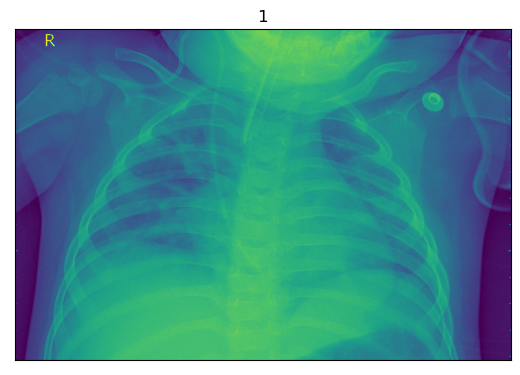

In [66]:
im, name = dataset.__getitem__(-1)
im, name = dataset[-1]
print(im.shape)

# To plot it, convert it back as integer
im = im.int()
plt.figure()
plt.imshow(im)
plt.title(name)
plt.xticks([]), plt.yticks([])
plt.show()

In [67]:
train_dir = 'Dataset/train'
val_dir = 'Dataset/val'
test_dir = 'Dataset/test'
train_data = XrayDataset(image_dir=train_dir)
val_data = XrayDataset(image_dir=val_dir)
test_data = XrayDataset(image_dir=test_dir)

In [68]:
# Set the batch size (=number of samples/images in each batch) and create the dataloader
batch_size = 5
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [69]:
train_dataloader